In [71]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
#%matplotlib notebook

x = np.array([[1, 2, 3]])
c = 0.1 * np.asarray([[0, 1], [1, 0]])#gate 가중치 = 0.1
h = 0.1 * np.asarray([[0, 1]])

In [72]:
x.shape

(1, 3)

In [73]:
c.shape

(2, 2)

In [74]:
h.shape

(1, 2)

In [75]:
c.size # num units

4

In [81]:
def sigmoid_array(x):
     return 1 / (1 + np.exp(-x))
    
class lstmcell:
    def __init__(self, num, x_, c_, h_):
        self.x = x_ #input
        self.c = c_# 초기 state
        self.h = h_# 초기 output
        self.num = 2

    
    def build(self):
        num_units = self.num #hidden layer 갯수

        args = np.concatenate((self.x, self.h), axis=1)

        out_size = 4 * num_units#n_gate = 4
        proj_size = args.shape[-1]

        weights = np.ones([proj_size, out_size]) * 0.5

        out = np.matmul(args, weights)

        bias = np.ones([out_size]) * 0.5

        concat = out + bias

        i, j, f, o = np.split(concat, 4, 1)

        g = np.tanh(j)#Cell 현재값
        
        forget_bias = 1.0

        sigmoid_f = sigmoid_array(f + forget_bias)#forget gate

        sigmoid_array(i) * g

        new_c = c * sigmoid_f + sigmoid_array(i) * g

        new_h = np.tanh(new_c) * sigmoid_array(o)

        new_c = np.split(new_c, 1, 1)
        new_h = np.split(new_h, 1, 1)

        return new_h, new_c

In [82]:
num_units = c.size

In [83]:
def propagation(num_units, data, new_state, new_output):
    cell = lstmcell(num_units, x, new_state, new_output)
    output, state = cell.build()
    new_output = np.asarray(output)
    new_state = np.asarray(state)
    new_output = new_output.reshape(1, num_units)
    new_state = new_state.reshape(1, num_units)
    return new_state, new_output

#Prediction part

#Recurrent model with numpy

In [84]:
new_state, new_output = c, h
error = np.array([0, 0])
state_predict = np.array([0.88490995, 1.84762319])
losses1 = []

In [85]:
for i in range(1, 31, 1):
    new_state, new_output = propagation(num_units, x, new_state, new_output)
    global states
    error = (state_predict.mean()**2 - new_state.mean()**2)
    loss = error/i
    losses1.append(loss)
    
    print(i)
    print("loss :        ", [loss.mean()])
    print("current output",new_output)
    print("current state ", new_state, "\n")

1
loss :         [0.8263827034089533]
current output [[0.72800121 0.7672082  0.7672082  0.72800121]]
current state  [[0.97047462 1.06942895 1.06942895 0.97047462]] 

2
loss :         [0.38935514171347485]
current output [[0.75361459 0.79258112 0.79258112 0.75361459]]
current state  [[0.99318417 1.09293573 1.09293573 0.99318417]] 

3
loss :         [0.2593286902171008]
current output [[0.75401031 0.79297363 0.79297363 0.75401031]]
current state  [[0.99352511 1.09328899 1.09328899 0.99352511]] 

4
loss :         [0.19449379091509267]
current output [[0.75401627 0.79297954 0.79297954 0.75401627]]
current state  [[0.99353025 1.09329431 1.09329431 0.99353025]] 

5
loss :         [0.1555949998829392]
current output [[0.75401636 0.79297963 0.79297963 0.75401636]]
current state  [[0.99353032 1.09329439 1.09329439 0.99353032]] 

6
loss :         [0.12966249949022748]
current output [[0.75401636 0.79297963 0.79297963 0.75401636]]
current state  [[0.99353032 1.09329439 1.09329439 0.99353032]] 

7

Text(0.5,0,'Step')

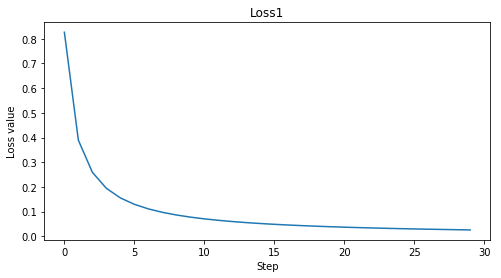

In [86]:
plt.rcParams["figure.figsize"] = (8, 4)
plt.plot(losses1)
plt.title('Loss1')
plt.ylabel('Loss value')
plt.xlabel('Step')

########################################

#Recurrent model with tensorflow squared_error loss

In [17]:
sess = tf.Session()

In [18]:
new_state, new_output = c, h
error = np.array([0, 0])
state_predict = np.array([0.88490995, 1.84762319])
losses2 = []

In [19]:
for i in range(1, 31, 1):
    new_state, new_output = propagation(num_units, x, new_state, new_output)
    loss = sess.run(tf.losses.mean_squared_error(labels=state_predict.mean(), predictions=new_state.mean()))
    global losses
    losses2.append(loss)
    
    print(i)
    print("loss :        ", [loss])
    print("current output",new_output)
    print("current state ", new_state, "\n")

ValueError: operands could not be broadcast together with shapes (2,2) (1,4) 

Text(0.5,0,'Step')

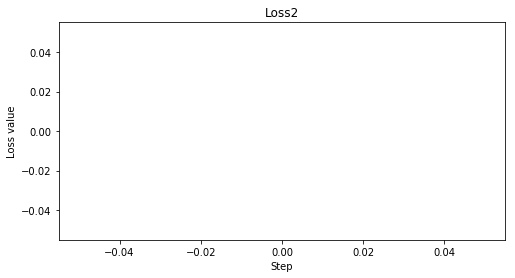

In [20]:
plt.rcParams["figure.figsize"] = (8, 4)
plt.plot(losses2)
plt.title('Loss2')
plt.ylabel('Loss value')
plt.xlabel('Step')

###########################################

#while_loop rnn

In [93]:
x_2 = np.asarray([[1, 2]])
c = 0.1 * np.asarray([[8, 7]])#gate 가중치 = 0.1
h = 0.1 * np.asarray([[0, 5]])
num = c.size
def sigmoid_array(x):
     return 1 / (1 + tf.exp(-x))
    
class lstmcell2:
    def __init__(self, c_, h_):
        global x_2
        global num
        self.x = x_2 #input
        self.c = c_# 초기 state
        self.h = h_# 초기 output
        self.num = num#self.c.size

    
    def build(self):
        num_units = self.num #hidden layer 갯수
        args = tf.concat((self.x, self.h), axis=1)

        out_size = 4 * num_units#n_gate = 4
        proj_size = args.shape[-1]

        weights = np.ones([proj_size, out_size]) * 0.5

        out = tf.matmul(args, weights)

        bias = np.ones([out_size]) * 0.5

        concat = out + bias

        i, j, f, o = tf.split(concat, 4, 1)

        g = tf.tanh(j)#Cell 현재값
        
        forget_bias = 1.0

        sigmoid_f = sigmoid_array(f + forget_bias)#forget gate

        sigmoid_array(i) * g

        new_c = c * sigmoid_f + sigmoid_array(i) * g

        new_h = tf.tanh(new_c) * sigmoid_array(o)

        new_c = tf.split(new_c, 1, 1)
        new_h = tf.split(new_h, 1, 1)
        
        
        return new_h + new_c

In [94]:
def body(last_output, last_state, step):
    
    output = lstmcell2(last_output,last_state).build()[0]
    state = lstmcell2(last_output,last_state).build()[1]
    
    return output, state, tf.add(step, 1)
    

timesteps = 100

steps = lambda a, b, step: tf.less(step, timesteps)

lstm_output, lstm_state, step = tf.while_loop(steps, body, (h, c, 0), parallel_iterations=20)

In [89]:
sess = tf.Session()

In [39]:
state_predict = sess.run(lstm_state)
state_predict = state_predict.mean()

In [40]:
states_costs = []
error = []
loss = []
losses = []

In [41]:
time = 10
for i in range(time):
    timesteps = i

    steps = lambda a, b, step: tf.less(step, timesteps)

    lstm_output, lstm_state, step = tf.while_loop(steps, body, (h, c, 0), parallel_iterations=20)
    
    states_costs.append(lstm_state)

In [42]:
states_costs = sess.run(states_costs)

In [43]:
for j in range(time):
    error.append(states_costs[j])
    loss.append(error[j].mean())
    losses.append(tf.losses.mean_squared_error(labels=state_predict, predictions=loss[j]))

In [44]:
losses = sess.run(losses)

Text(0.5,0,'Step')

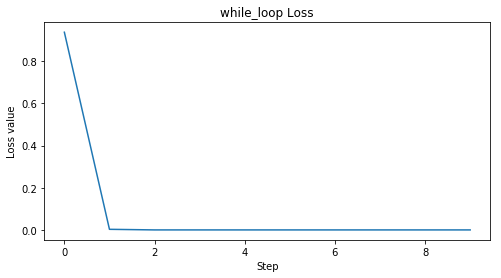

In [45]:
plt.plot(losses)
plt.title('while_loop Loss')
plt.ylabel('Loss value')
plt.xlabel('Step')